In [1]:
import xarray as xr
import numpy as np
import xgcm
import xrft

from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

from bbl_utils import *

import warnings
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

### Physical parameters

In [2]:
Γ = 0.0008613659531090722
θ = 2.e-3
f = 0.53e-4

### Load dataset

In [3]:
nIter = 25
step0 = 14400
nstep = step0*2

iters = range(step0,nIter*nstep+step0,nstep)
iters_mean = range(nstep, nIter*nstep, nstep)
print("Iters: ",list(iters_mean))

Iters:  [28800, 57600, 86400, 115200, 144000, 172800, 201600, 230400, 259200, 288000, 316800, 345600, 374400, 403200, 432000, 460800, 489600, 518400, 547200, 576000, 604800, 633600, 662400, 691200]


In [4]:
data_dir = "../../MITgcm/experiments/rotated/run/"
ds_snap = open_mdsdataset(data_dir,iters=iters,ignore_unknown_vars=True,prefix=["snapshotDiag"])
ds = open_mdsdataset(data_dir,iters=iters_mean,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])

### Pre-process dataset

In [5]:
ds, coords, grid = pre_process(ds, timestep=30.)
ds, coords = add_cartesian_coordinates(ds, coords, θ)
ds = add_background_temp(ds, Γ)
ds, coords = add_hab_coordinates(ds, coords)

ds_snap, coords_snap, gri_snapd = pre_process(ds_snap, timestep=30.)
ds_snap, coords_snap = add_cartesian_coordinates(ds_snap, coords_snap, θ)
ds_snap = add_background_temp(ds_snap, Γ)
ds_snap, coords_snap = add_hab_coordinates(ds_snap, coords_snap)

print(ds['time']/86400.)
ds

<xarray.DataArray 'time' (time: 24)>
array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220.,
       230., 240.])
Coordinates:
  * time     (time) float64 8.64e+05 1.728e+06 2.592e+06 ... 1.987e+07 2.074e+07


<xarray.Dataset>
Dimensions:   (XC: 256, XG: 256, YC: 256, YG: 256, Z: 280, Zl: 280, Zp1: 281, Zu: 280, time: 24)
Coordinates:
  * time      (time) float64 8.64e+05 1.728e+06 ... 1.987e+07 2.074e+07
  * XC        (XC) >f8 300.0 900.0 1.5e+03 ... 1.521e+05 1.527e+05 1.533e+05
  * YC        (YC) >f8 300.0 900.0 1.5e+03 ... 1.521e+05 1.527e+05 1.533e+05
  * XG        (XG) >f8 0.0 600.0 1.2e+03 ... 1.518e+05 1.524e+05 1.53e+05
  * YG        (YG) >f8 0.0 600.0 1.2e+03 ... 1.518e+05 1.524e+05 1.53e+05
  * Z         (Z) float64 2.627e+03 2.572e+03 2.519e+03 ... 6.0 2.0 -2.0
  * Zp1       (Zp1) float64 2.655e+03 2.6e+03 2.545e+03 ... 4.0 0.0 -4.0
  * Zu        (Zu) float64 2.6e+03 2.545e+03 2.493e+03 ... 4.0 0.0 -4.0
  * Zl        (Zl) float64 2.655e+03 2.6e+03 2.545e+03 2.493e+03 ... 8.0 4.0 0.0
    Zr        (XC, Z) float64 2.628e+03 2.573e+03 2.52e+03 ... 312.6 308.6 304.6
    Xr        (XC, Z) float64 294.7 294.9 295.0 ... 1.533e+05 1.533e+05
    Zr_V      (XC, Z) float64 2.628e+03 2.573e+03 2.52e+03 ... 312.6 308.6 304.6
    Xr_V      (XC, Z) float64 294.7 294.9 295.0 ... 1.533e+05 1.533e+05
    Zr_U      (XG, Z) float64 2.627e+03 2.572e+03 2.519e+03 ... 308.0 304.0
    Xr_U      (XG, Z) float64 -5.255 -5.145 -5.038 ... 1.53e+05 1.53e+05
    Zr_W      (XC, Zl) float64 2.656e+03 2.6e+03 2.546e+03 ... 314.6 310.6 306.6
    Xr_W      (XC, Zl) float64 294.7 294.8 294.9 ... 1.533e+05 1.533e+05
    Z_hab     (Z, YC, XC) float64 dask.array<chunksize=(280, 256, 256), meta=np.ndarray>
    Zl_hab    (Zl, YC, XC) float64 dask.array<chunksize=(280, 256, 256), meta=np.ndarray>
Data variables:
    THETA     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    UVEL      (time, Z, YC, XG) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    PHIHYD    (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    gT_Forc   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    TOTTTEND  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    TOTUTEND  (time, Z, YC, XG) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    TOTVTEND  (time, Z, YG, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    THETA_BG  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>

### Calculate derived variables

In [6]:
ζ = (-grid.diff(ds.UVEL * coords.dxC, 'Y', boundary='extend')
     +grid.diff(ds.VVEL * coords.dyC, 'X', boundary='extend'))/coords.rAz

### Plotting

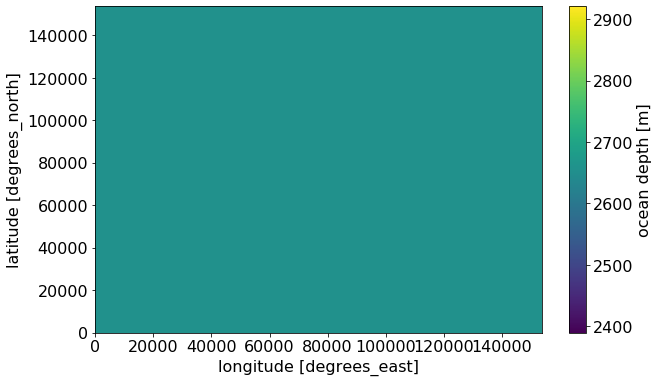

In [7]:
coords['Depth'].plot()

(0, 1500)

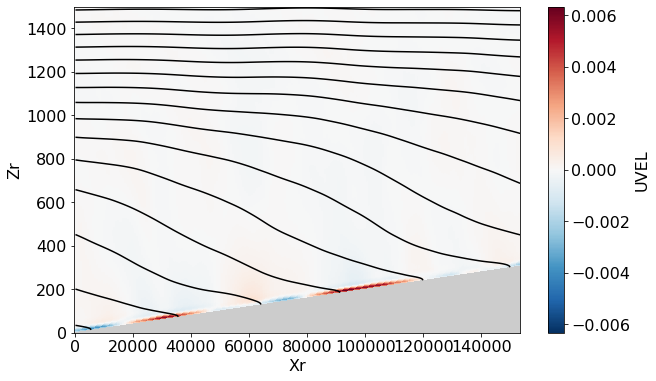

In [16]:
plt.subplot(1,1,1, facecolor=(.8, .8, .8))
ds['UVEL'] = ds['UVEL'].where(ds['UVEL'] != 0.)
ds['UVEL'].isel(time=slice(-14, None, 1)).mean(dim=['YC', 'time']).plot(x='Xr_U', y='Zr_U')
ds['THETA_BG'].isel(time=slice(-14, None, 1)).mean(dim=['YC', 'time']).plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0., 2.5, 0.05))
plt.ylim([0, 1500])

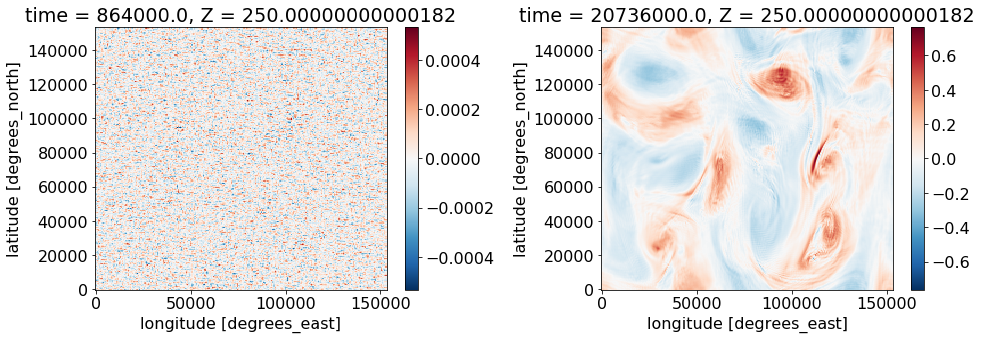

In [30]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
(ζ/f).sel(Z=250, method='nearest').isel(time=0).plot()

plt.subplot(1,2,2)
(ζ/f).sel(Z=250, method='nearest').isel(time=-1).plot()

plt.tight_layout()

(0, 2500)

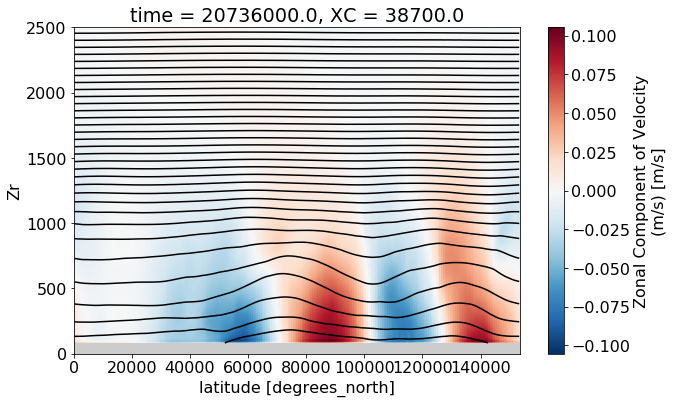

In [20]:
plt.subplot(1,1,1, facecolor=(.8, .8, .8))
ds['UVEL'] = ds['UVEL'].where(ds['UVEL'] != 0.)
ds['UVEL'].isel(time=-1, XG=64).plot(x='YC', y='Zr_U')
ds['THETA_BG'].isel(time=-1, XC=64).plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0., 2.5, 0.05))
plt.ylim([0, 2500])

### Spectral analysis

In [26]:
up = ds['UVEL'].sel(Z=300, method='nearest') - ds['UVEL'].sel(Z=300, method='nearest').mean(dim=['XG', 'YC'])
vp = ds['VVEL'].sel(Z=300, method='nearest') - ds['VVEL'].sel(Z=300, method='nearest').mean(dim=['XC', 'YG'])

uhat2 = xrft.power_spectrum(grid.interp(up,'X').chunk({'time':1, 'YC':-1, 'XC':-1}),
                         dim=['XC','YC'], detrend='linear', window=True).compute()
vhat2 = xrft.power_spectrum(grid.interp(vp,'Y').chunk({'time':1, 'YC':-1, 'XC':-1}),
                         dim=['XC','YC'], detrend='linear', window=True).compute()

ekehat = .5*(uhat2 + vhat2)
ekehat;

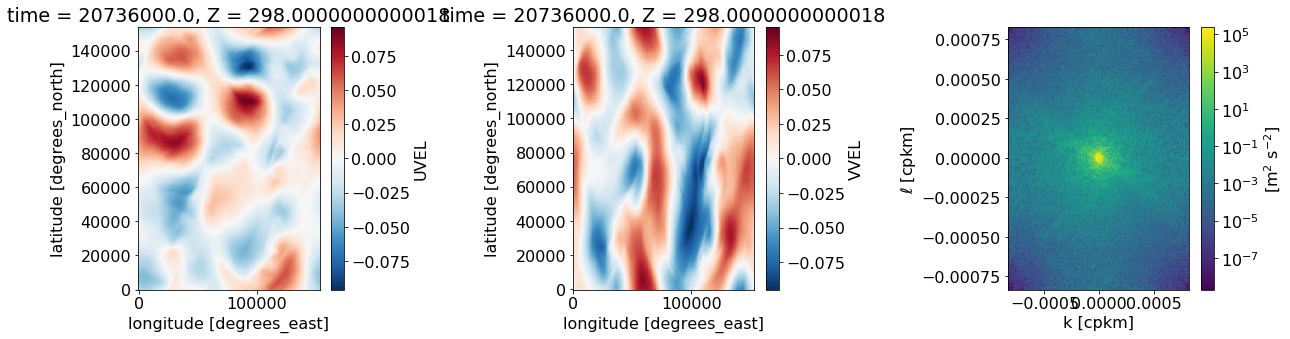

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
fig.set_tight_layout(True)
up.isel(time=-1).plot(ax=axes[0])
vp.isel(time=-1).plot(ax=axes[1])
im = axes[2].pcolormesh(ekehat.freq_XC, ekehat.freq_YC, ekehat.isel(time=-1),
                       norm=colors.LogNorm())
cbar = fig.colorbar(im, ax=axes[2])
cbar.set_label(r'[m$^2$ s$^{-2}$]')
axes[2].set_xlabel(r'k [cpkm]')
axes[2].set_ylabel(r'$\ell$ [cpkm]');

plt.tight_layout()

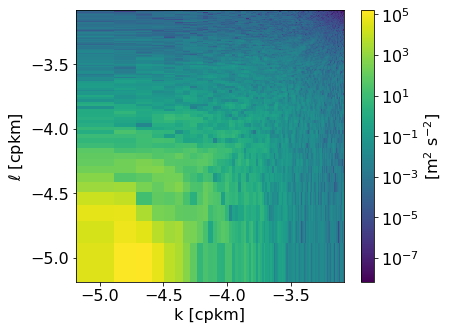

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
nx = ekehat.freq_XC.size
ny = ekehat.freq_YC.size
im = ax.pcolormesh(np.log10(ekehat.freq_XC.isel(freq_XC=slice(nx//2+1,nx))),
                   np.log10(ekehat.freq_YC.isel(freq_YC=slice(ny//2+1,ny))),
                        ekehat.isel(time=-1).isel(freq_XC=slice(nx//2+1,nx), freq_YC=slice(ny//2+1,ny)),
                       norm=colors.LogNorm())
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'[m$^2$ s$^{-2}$]')
ax.set_xlabel(r'k [cpkm]')
ax.set_ylabel(r'$\ell$ [cpkm]');

In [29]:
uiso2 = xrft.isotropic_powerspectrum(grid.interp(up,'X').isel(time=-1).chunk({'YC':-1, 'XC':-1}), dim=['XC','YC'], detrend='linear', window=True).compute()
viso2 = xrft.isotropic_powerspectrum(grid.interp(vp,'Y').isel(time=-1).chunk({'YC':-1, 'XC':-1}), dim=['XC','YC'], detrend='linear', window=True).compute()
ekeiso = .5*(uiso2 + viso2)
ekeiso

AttributeError: 'numpy.ndarray' object has no attribute 'chunks'

### Energy budget

\begin{equation}
K_{t} = \langle \overline{u'b'} \sin{\theta} + \overline{w'b'}\cos{\theta} \rangle - \langle \overline{u}_{z} \overline{u'w'} + \overline{v}_{z} \overline{v'w'} \rangle -
\langle v (\overline{u'^{2}_{z}} + \overline{v'^{2}_{z}} ) \rangle + \langle \overline{u'\mathcal{D}u'} + \overline{v'\mathcal{D}v'} \rangle
\end{equation}

Note: $\overline{\mathbf{u}'b'} = \overline{\mathbf{u}b} - \overline{\mathbf{u}}\overline{b}$ terms can be diagnosed from the `*VELTH` (or `ADV*_TH`) diagnostics; $u'w'$ and $v'w'$ terms diagnosed from `WU_VEL` and `WV_VEL`.

Note: We need to output kinetic energy dissipation due to viscosity and hyperviscosity online in the MITgcm.

In [ ]:
ds